In [1]:
# import nltk
# nltk.download('stopwords')

%matplotlib inline


In [2]:
import pandas as pd

df_livemint = pd.read_csv("articles_livemint_final.csv")
df_economictimes = pd.read_csv("news_articles_cleaned2.csv.xls")
df_livemint.sample(5)
articles_df = pd.concat([df_livemint,df_economictimes],ignore_index=True)
articles_df = articles_df.sample(frac=1).reset_index(drop=True)
articles_df


,Title,URL,Content
0,What does Donald Trump’s tariff war mean for I...,https://www.livemint.com/economy/donald-trump-...,Trump Tariff War:United States PresidentDonald...
1,Canada Ready for Talks on USMCA and China Dump...,https://www.livemint.com/economy/canada-ready-...,Canada is ready to begin early talks on review...
2,UK and EU Advance Talks on Seizing Frozen Russ...,https://www.livemint.com/economy/uk-and-eu-adv...,The UK and European Union will advance talks o...
3,"There ain't no Golden Age-Just Trump, turmoil,...",https://economictimes.indiatimes.com/opinion/e...,Donald Trump wants to smash the current world ...
4,Donald Trump claims tariff is the only cure to...,https://www.livemint.com/economy/donald-trump-...,US PresidentDonald Trumpdefended his reciproca...
...,...,...,...
617,The ghost of inflation may not leave the India...,https://economictimes.indiatimes.com/news/econ...,Inflation in India is unlikely to ease quickly...
618,India seeks to shake off ‘tariff king’ label i...,https://economictimes.indiatimes.com/news/econ...,India’s government made significant cuts to im...
619,Economic Survey takes a hard look at Elephant ...,https://economictimes.indiatimes.com/news/econ...,India's journey to becoming a developed nation...
620,"GST rate cut soon, tax review in final stages,...",https://www.livemint.com/economy/gst-rate-cut-...,Goods and Services Tax (GST) Council is in the...


In [3]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)  # remove special chars
    return text.strip().lower()

articles_df['Cleaned Content'] = articles_df['Content'].apply(clean_text)


In [4]:
articles_df.shape

(622, 4)

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # for word_tokenize

# Get English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered)

# Apply to the DataFrame
articles_df['Cleaned Content'] = articles_df['Cleaned Content'].apply(remove_stopwords)

# print(df[['Content', 'Cleaned Content']])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
articles_df.head()

,Title,URL,Content,Cleaned Content
0,What does Donald Trump’s tariff war mean for I...,https://www.livemint.com/economy/donald-trump-...,Trump Tariff War:United States PresidentDonald...,trump tariff warunited states presidentdonald ...
1,Canada Ready for Talks on USMCA and China Dump...,https://www.livemint.com/economy/canada-ready-...,Canada is ready to begin early talks on review...,canada ready begin early talks reviewing north...
2,UK and EU Advance Talks on Seizing Frozen Russ...,https://www.livemint.com/economy/uk-and-eu-adv...,The UK and European Union will advance talks o...,uk european union advance talks seize frozen r...
3,"There ain't no Golden Age-Just Trump, turmoil,...",https://economictimes.indiatimes.com/opinion/e...,Donald Trump wants to smash the current world ...,donald trump wants smash current world economi...
4,Donald Trump claims tariff is the only cure to...,https://www.livemint.com/economy/donald-trump-...,US PresidentDonald Trumpdefended his reciproca...,us presidentdonald trumpdefended reciprocal ta...


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    return 'positive' if score['compound'] > 0 else 'negative'

articles_df['Sentiment'] = articles_df['Cleaned Content'].apply(get_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
articles_df.sample(10)

,Title,URL,Content,Cleaned Content,Sentiment
203,Municipal bond issuances in India to exceed ₹...,https://www.livemint.com/economy/municipal-bon...,"New Delhi [India], March 19 (ANI): Municipal b...",new delhi india march 19 ani municipal bond is...,positive
435,Economic Survey shows concern for workplace me...,https://economictimes.indiatimes.com/news/econ...,Workplace mental health issues have been a hot...,workplace mental health issues hot topic latel...,negative
316,Rising trend in Bengaluru? Woman claims meetin...,https://economictimes.indiatimes.com/magazines...,Bengaluru’s chaotic traffic is a well-known st...,bengalurus chaotic traffic wellknown struggle ...,positive
230,Stable inflation is important to sustain growt...,https://economictimes.indiatimes.com/news/econ...,Mumbai: Reserve Bank of India (RBI) Governor S...,mumbai reserve bank india rbi governor shaktik...,positive
525,Manufacturing’s ‘Be Your Boss’ moment: About 4...,https://economictimes.indiatimes.com/news/econ...,Nearly half the employees in the manufacturing...,nearly half employees manufacturing sector sel...,negative
81,"America's pain, India's gain? US recession can...",https://economictimes.indiatimes.com/news/econ...,As US President Donald Trump's tariffs threate...,us president donald trumps tariffs threaten gl...,negative
496,Economic Survey: India's real GDP for FY26 pro...,https://economictimes.indiatimes.com/news/econ...,India's real Gross Domestic Product (GDP) grow...,indias real gross domestic product gdp growth ...,negative
211,"New RBI governor seeks to improve forecasts, s...",https://economictimes.indiatimes.com/news/econ...,India's new central bank governor Sanjay Malho...,indias new central bank governor sanjay malhot...,negative
263,"Union minister Jitendra Singh says Rs 1,000-cr...",https://economictimes.indiatimes.com/news/scie...,"NEW DELHI: The Rs 1,000 crore funding scheme f...",new delhi rs 1000 crore funding scheme space s...,positive
50,India grows 6.2% in Q3; FY25 forecast bumped u...,https://economictimes.indiatimes.com/news/econ...,India's economy picked up pace in the December...,indias economy picked pace december quarter ex...,positive


In [9]:
# BTS of VADER SENTIMENT CLASSIFICATION
#  {
#     'neg': 0.1,      # proportion of negative words
#     'neu': 0.7,      # proportion of neutral words
#     'pos': 0.2,      # proportion of positive words
#     'compound': 0.34 # overall score (from -1 to 1)
# }

In [10]:
articles_df['Sentiment'].value_counts()

Sentiment
positive    383
negative    239
Name: count, dtype: int64

In [11]:
articles_df.to_excel("articles.xlsx", index=False)

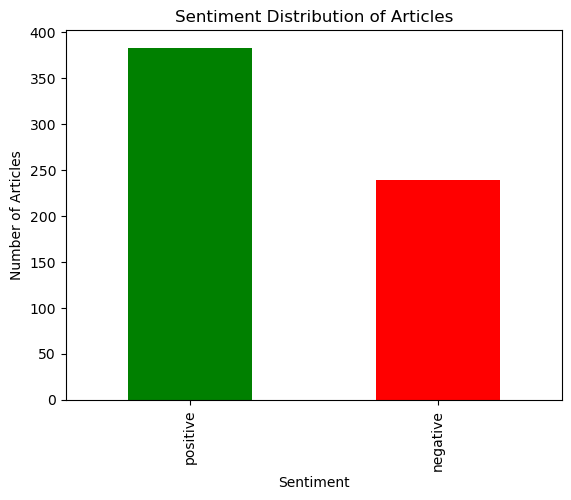

Sentiment
positive    383
negative    239
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt

articles_df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Sentiment Distribution of Articles")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.show()
articles_df['Sentiment'].value_counts()

In [13]:
from ydata_profiling import ProfileReport

In [ ]:
# Create the profile report
profile = ProfileReport(articles_df, title="News Articles Profiling Report", explorative=True)

# Export to HTML file
profile.to_file("news_articles_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your CSV
# df = pd.read_csv('articles_livemint_final.csv')

# Title
st.title("📰 News Article Sentiment Dashboard")

# Sidebar filter
sentiment = st.sidebar.selectbox("Select Sentiment", ["All"] + list(articles_df['Sentiment'].unique()))

# Filter DataFrame
if sentiment != "All":
    filtered_df = articles_df[articles_df['Sentiment'] == sentiment]
else:
    filtered_df = articles_df

# Show basic stats
st.subheader("Sentiment Distribution")
st.bar_chart(articles_df['Sentiment'].value_counts())

# Word Cloud
st.subheader("Word Cloud of Cleaned Content")
text = " ".join(filtered_df['Cleaned Content'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
st.image(wordcloud.to_array())

# Article Search
st.subheader("Search Articles")
search_term = st.text_input("Enter keyword to search in titles")
if search_term:
    results = articles_df[articles_df['title'].str.contains(search_term, case=False)]
    st.write(f"Found {len(results)} articles")
    for i, row in results.iterrows():
        st.markdown(f"**{row['title']}**")
        st.write(row['content'])
        st.markdown("---")


2025-05-12 10:56:36.195 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:56:37.059 
  command:

    streamlit run C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-12 10:56:37.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:56:37.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:56:37.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:56:37.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:56:37.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:56:37.065 Sessi